In [66]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import wilcoxon


In [193]:
df = pd.read_excel('SEED_data_long_03.21.2023.xlsx',skiprows=1, header=0)
df = df[df['Participant ID'].astype(str).str.strip() != '']

#excluded_participants = [7, 9, 19, 22, 33, 24, 13]
excluded_participants = [19,7]
df = df[~df['Participant ID'].astype(float).isin(excluded_participants)]

# Convert -99 or 0 to NaN
df.replace([-99, 0], np.nan, inplace=True)

df

,Variable_item_descriptions,Researcher comments,Participant ID,Week,Condition,Are you currently a college student?,Are you currently financially supported by a parent/guardian/or other individual(s)?,Are you currently financially supported by one parent/guardian/or other individual or more than one parent/guardian/or other individual?,Are your parents/ guardians/ or other individuals currently living together?,What was your primary parent/ guardian/ or other supporterâ€™s estimated financial earnings from the previous year?,...,Weekly Fairly Minute average,Weekly Very Active Minute average,Weekly Active Calories burned average,Recode of contemplation ladder,Self-Efficacy: Coping score,Self-Efficacy: Task score,Self-Efficacy: Scheduling score,Motivation: Intrinsic score,Motivation: Extrinsic score,Intention to Engage in Physical Activity score
0,NaN,,1,NaN,1,2,,,,,...,,,,,,,,,,
1,NaN,,1,1.0,1,,,,,,...,3.285714,2,1159.285714,5,1,10,4.666667,3.75,2,7
2,NaN,,1,2.0,1,,,,,,...,0.285714,1.571429,1387.142857,8,4.666667,9,7,5,2.5,6.666667
3,NaN,,1,3.0,1,,,,,,...,0.857143,1.142857,1362.714286,8,1,8,5.333333,4.5,3.5,7
4,NaN,,1,4.0,1,,,,,,...,4.285714,2.285714,1510.571429,5,1,8.25,5.666667,5,2.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,,41,8.0,1,,,,,,...,1.142857,0.142857,777.857143,10,8.333333,10,6,5,2.75,6.666667
582,NaN,,41,9.0,1,,,,,,...,NaN,NaN,731.285714,,,,,,,
583,NaN,,41,10.0,1,,,,,,...,1.857143,1.714286,641.285714,,,,,,,
584,NaN,,41,11.0,1,,,,,,...,2.571429,3.142857,736.285714,,,,,,,


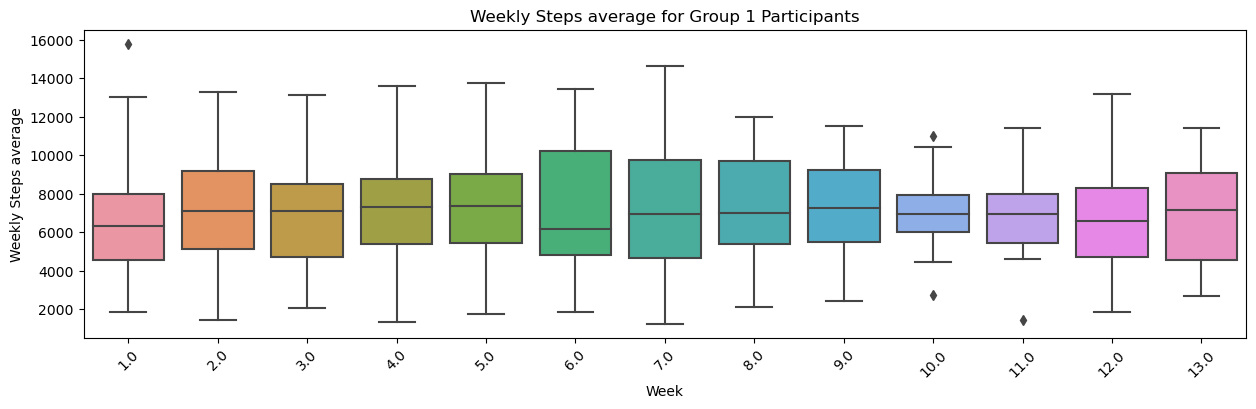

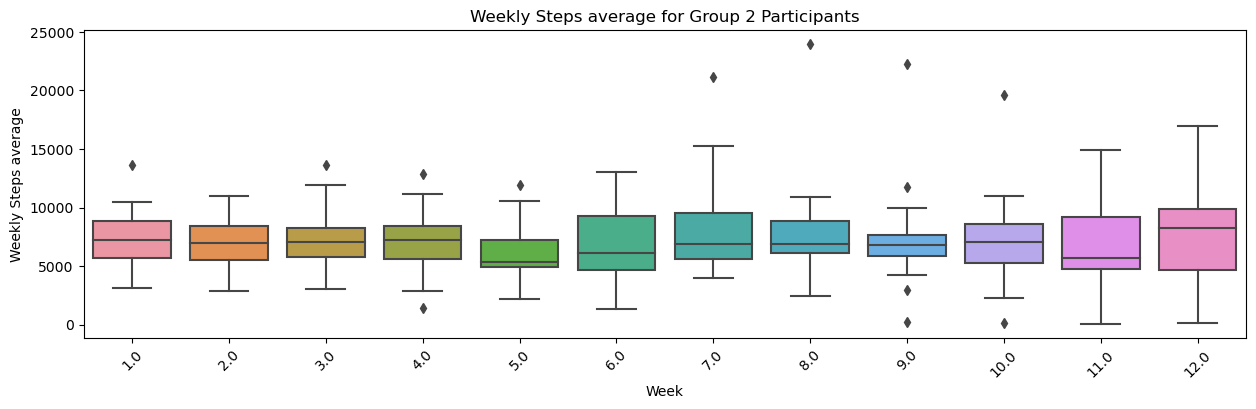

In [236]:
data = df.copy()

pivot_data_1 = data[data['Condition']==1].pivot(index='Participant ID', columns='Week', values='Weekly Steps average')
pivot_data_2 = data[data['Condition']==2].pivot(index='Participant ID', columns='Week', values='Weekly Steps average')


# Create boxplot for each week
plt.figure(figsize=(15, 4))
sns.boxplot(data=pivot_data_1)
plt.title('Weekly Steps average for Group 1 Participants')
plt.xlabel('Week')
plt.ylabel('Weekly Steps average')
plt.xticks(rotation=45)
plt.show()

# Create boxplot for each week
plt.figure(figsize=(15, 4))
sns.boxplot(data=pivot_data_2)
plt.title('Weekly Steps average for Group 2 Participants')
plt.xlabel('Week')
plt.ylabel('Weekly Steps average')
plt.xticks(rotation=45)
plt.show()

Wilcoxon Signed-Rank Test:
Statistic: 56.0
P-value: 0.12318801879882812
There is no significant difference in physical activity between Week 1 and Week 2.


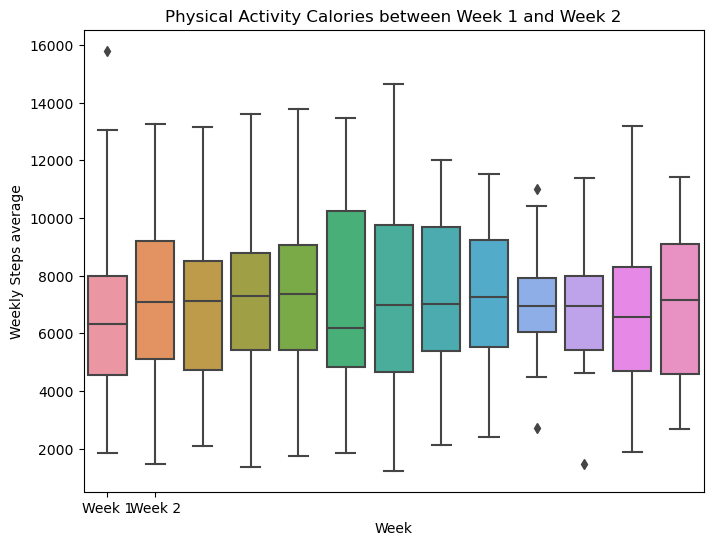

In [203]:

data.dropna(inplace=True, subset=['Weekly Steps average'])

valid_participants = data[data['Condition']==1].groupby('Participant ID').filter(lambda x: ((x['Week'] == 1) & ~(x['Weekly Steps average'].isnull()) & (x['Weekly Steps average'] != 0)).any() and ((x['Week'] == 2) & ~(x['Weekly Steps average'].isnull()) & (x['Weekly Steps average'] != 0)).any())

# Reset index
valid_participants.reset_index(drop=True, inplace=True)

week1_data = valid_participants[valid_participants['Week'] == 1]['Weekly Steps average']
week2_data = valid_participants[valid_participants['Week'] == 2]['Weekly Steps average']

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(week1_data, week2_data)

# Output results
print("Wilcoxon Signed-Rank Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in physical activity between Week 1 and Week 2.")
else:
    print("There is no significant difference in physical activity between Week 1 and Week 2.")
    
plt.figure(figsize=(8, 6))
pivot_data = valid_participants.pivot(index='Participant ID', columns='Week', values='Weekly Steps average')

sns.boxplot(data=pivot_data)
plt.title('Physical Activity Calories between Week 1 and Week 2')
plt.xlabel('Week')
plt.ylabel('Weekly Steps average')
plt.xticks(ticks=[0, 1], labels=['Week 1', 'Week 2'])
plt.show()

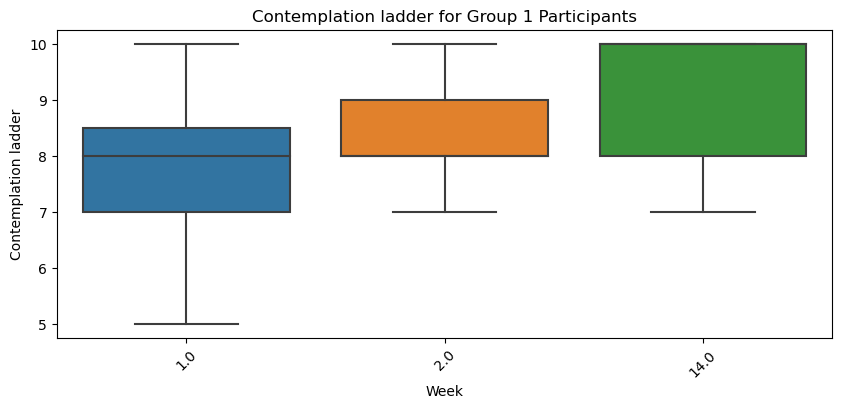

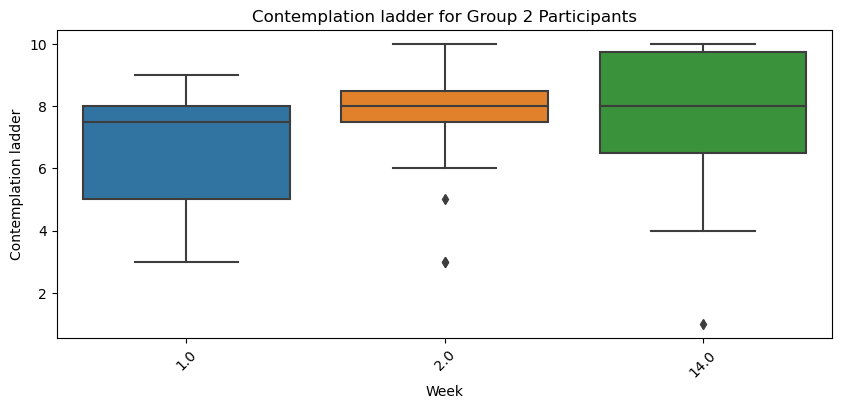

In [195]:
data = df.copy()

pivot_data_1 = data[data['Condition']==1].pivot(index='Participant ID', columns='Week', values='Recode of contemplation ladder')
pivot_data_2 = data[data['Condition']==2].pivot(index='Participant ID', columns='Week', values='Recode of contemplation ladder')


# Create boxplot for each week
plt.figure(figsize=(10, 4))
sns.boxplot(data=pivot_data_1)
plt.title('Contemplation ladder for Group 1 Participants')
plt.xlabel('Week')
plt.ylabel('Contemplation ladder')
plt.xticks(rotation=45)
plt.show()

# Create boxplot for each week
plt.figure(figsize=(10, 4))
sns.boxplot(data=pivot_data_2)
plt.title('Contemplation ladder for Group 2 Participants')
plt.xlabel('Week')
plt.ylabel('Contemplation ladder')
plt.xticks(rotation=45)
plt.show()

Wilcoxon Signed-Rank Test:
Statistic: 11.0
P-value: 0.04875841941501396
There is a significant difference between Week 1 and Week 2.


/Users/mahsanabbasi/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


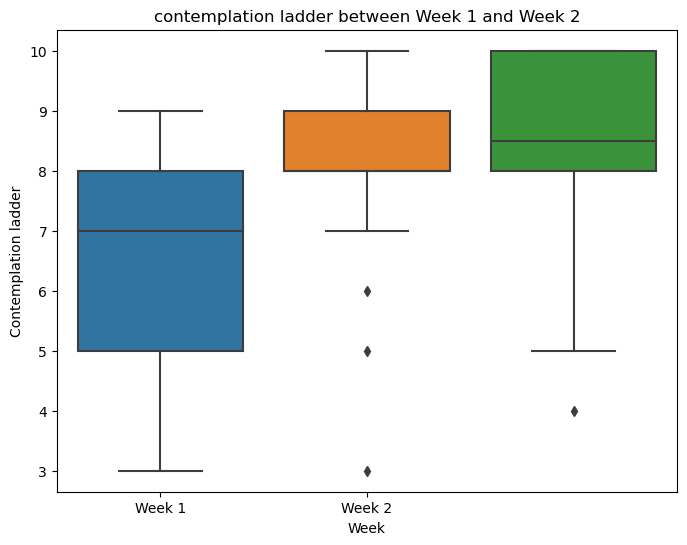

In [208]:

data.dropna(inplace=True, subset=['Recode of contemplation ladder'])

valid_participants = data[data['Condition']==2].groupby('Participant ID').filter(lambda x: ((x['Week'] == 1) & ~(x['Recode of contemplation ladder'].isnull()) & (x['Recode of contemplation ladder'] != 0)).any() and ((x['Week'] == 2) & ~(x['Recode of contemplation ladder'].isnull()) & (x['Recode of contemplation ladder'] != 0)).any())

# Reset index
valid_participants.reset_index(drop=True, inplace=True)

week1_data = valid_participants[valid_participants['Week'] == 1]['Recode of contemplation ladder']
week2_data = valid_participants[valid_participants['Week'] == 2]['Recode of contemplation ladder']

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(week1_data, week2_data)

# Output results
print("Wilcoxon Signed-Rank Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference between Week 1 and Week 2.")
else:
    print("There is no significant difference Week 1 and Week 2.")
    
plt.figure(figsize=(8, 6))
pivot_data = valid_participants.pivot(index='Participant ID', columns='Week', values='Recode of contemplation ladder')

sns.boxplot(data=pivot_data)
plt.title('contemplation ladder between Week 1 and Week 2')
plt.xlabel('Week')
plt.ylabel('Contemplation ladder')
plt.xticks(ticks=[0, 1], labels=['Week 1', 'Week 2'])
plt.show()

In [221]:
from sklearn.linear_model import LinearRegression

dataframe = data.copy()
dataframe.dropna(subset=['Weekly Steps average', 'Recode of contemplation ladder'], inplace=True)  
dataframe['Recode of contemplation ladder'] = pd.to_numeric(dataframe['Recode of contemplation ladder'], errors='coerce')
dataframe = dataframe[pd.to_numeric(data['Recode of contemplation ladder'], errors='coerce').notna()]
dataframe = dataframe[pd.to_numeric(data['Weekly Steps average'], errors='coerce').notna()]


# Initialize a dictionary to store correlation values for each participant
correlation_dict = {}

# Iterate over each participant
for participant_id, participant_data in dataframe.groupby('Participant ID'):
    participant_data.dropna(subset=['Weekly Steps average', 'Recode of contemplation ladder'], inplace=True)
    
    # Calculate correlation between contemplation and physical activity for this participant
    correlation = participant_data['Recode of contemplation ladder'].corr(participant_data['Weekly Steps average'])
    
    # Store correlation value in the dictionary
    correlation_dict[participant_id] = correlation

# Convert the dictionary to a DataFrame for easier manipulation
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Participant ID', 'Correlation'])

# Calculate aggregate statistics
mean_correlation = correlation_df['Correlation'].mean()
std_correlation = correlation_df['Correlation'].std()

# Output results
print("Mean Correlation:", mean_correlation)
print("Standard Deviation of Correlation:", std_correlation)


Mean Correlation: -0.028227030450399437
Standard Deviation of Correlation: 0.37722270131409785


/var/folders/zx/wy99c06540n6q85dj4866rx00000gn/T/ipykernel_14104/487753156.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe = dataframe[pd.to_numeric(data['Weekly Steps average'], errors='coerce').notna()]
/Users/mahsanabbasi/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mahsanabbasi/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [244]:
X
dataframe = dataframe[dataframe['Recode of contemplation ladder'].astype(str).str.strip() != '']
dataframe['Recode of contemplation ladder'] = pd.to_numeric(dataframe['Recode of contemplation ladder'], errors='coerce')
dataframe = dataframe[pd.to_numeric(data['Recode of contemplation ladder'], errors='coerce').notna()]
dataframe = dataframe[pd.to_numeric(data['Weekly Steps average'], errors='coerce').notna()]

dataframe = dataframe[dataframe['Recode of contemplation ladder'].astype(str).str.strip() != '']
dataframe


/var/folders/zx/wy99c06540n6q85dj4866rx00000gn/T/ipykernel_14104/1834404902.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe = dataframe[pd.to_numeric(data['Recode of contemplation ladder'], errors='coerce').notna()]
/var/folders/zx/wy99c06540n6q85dj4866rx00000gn/T/ipykernel_14104/1834404902.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe = dataframe[pd.to_numeric(data['Weekly Steps average'], errors='coerce').notna()]


,Variable_item_descriptions,Researcher comments,Participant ID,Week,Condition,Are you currently a college student?,Are you currently financially supported by a parent/guardian/or other individual(s)?,Are you currently financially supported by one parent/guardian/or other individual or more than one parent/guardian/or other individual?,Are your parents/ guardians/ or other individuals currently living together?,What was your primary parent/ guardian/ or other supporterâ€™s estimated financial earnings from the previous year?,...,Weekly Fairly Minute average,Weekly Very Active Minute average,Weekly Active Calories burned average,Recode of contemplation ladder,Self-Efficacy: Coping score,Self-Efficacy: Task score,Self-Efficacy: Scheduling score,Motivation: Intrinsic score,Motivation: Extrinsic score,Intention to Engage in Physical Activity score
1,NaN,,1,1.0,1,,,,,,...,3.285714,2,1159.285714,5,1,10,4.666667,3.75,2,7
2,NaN,,1,2.0,1,,,,,,...,0.285714,1.571429,1387.142857,8,4.666667,9,7,5,2.5,6.666667
3,NaN,,1,3.0,1,,,,,,...,0.857143,1.142857,1362.714286,8,1,8,5.333333,4.5,3.5,7
4,NaN,,1,4.0,1,,,,,,...,4.285714,2.285714,1510.571429,5,1,8.25,5.666667,5,2.5,4
5,NaN,,1,5.0,1,,,,,,...,13.285714,9,1025.714286,8,1.666667,9.25,4.666667,2.75,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,NaN,,41,5.0,1,,,,,,...,0.285714,1.142857,671.571429,9,7,10,7.333333,5,2.75,6.666667
579,NaN,,41,6.0,1,,,,,,...,1.571429,0.714286,917.285714,9,7,9.25,7,4.5,2.75,5.666667
580,NaN,,41,7.0,1,,,,,,...,NaN,NaN,784.714286,10,8.666667,10,8.333333,6,2.75,7
581,NaN,,41,8.0,1,,,,,,...,1.142857,0.142857,777.857143,10,8.333333,10,6,5,2.75,6.666667


In [243]:
dataframe = data.copy()
dataframe.replace({'Weekly Steps average': {' ': pd.NA, 'NaN': pd.NA},
              'Recode of contemplation ladder': {' ': pd.NA, 'NaN': pd.NA}}, inplace=True)

# Drop rows with missing values in the specified columns
dataframe.dropna(subset=['Weekly Steps average', 'Recode of contemplation ladder'], inplace=True)

# Perform linear regression
X = dataframe['Recode of contemplation ladder']  # Independent variable (contemplation)
y = dataframe['Weekly Steps average']  # Dependent variable (physical activity)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict physical activity based on contemplation
y_pred = model.predict(X)

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Recode of contemplation ladder', y='Weekly Steps average', color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression: Contemplation vs Physical Activity')
plt.xlabel('Contemplation')
plt.ylabel('Physical Activity')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope and intercept of the regression line
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5.  8.  8.  5.  8.  5.  8.  5.  8.  8.  8.  3.  8.  6.  8.  8.  8.  8.
  9.  7.  8.  8.  9.  8.  8.  8.  8.  7.  7.  6.  5.  5.  5.  2.  8.  6.
  6.  8.  9.  9.  9.  9.  9.  9.  7. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.  8.  8.  8. 10. 10.  8.  5. 10. 10. 10. 10.  9.  6.
  7.  6.  7.  7.  7.  7.  7.  7.  8.  8.  8.  5.  8.  7.  6.  6.  6.  7.
  6.  5.  3.  4.  4.  4.  4.  4.  4.  4.  8.  8.  8.  8.  7.  9.  9.  9.
  9.  9.  8.  9.  9. 10. 10. 10. 10. 10. 10. 10. 10. 10.  5. 10. 10. 10.
 10. 10.  9. 10. 10. 10. 10.  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.
  8.  8.  7.  7.  7.  8.  8.  8.  9.  9.  8.  9.  9.  9.  9.  6.  6.  5.
  6.  8.  7.  6.  7.  8.  8.  8.  8.  7.  7.  7.  8.  7.  6.  6.  7.  8.
  8.  8.  8.  7.  9.  8.  8.  8.  7.  8.  9.  9.  9.  8.  8.  8. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8. 10.  3.  1.  1.  1.  1.  1.  1.  1.  1.  1.  8.
  8.  8. 10.  8. 10. 10.  9.  8. 10.  9.  5.  5.  8.  7.  7.  6.  6.  5.
  6.  5.  9.  9. 10.  9.  9.  9.  9.  9.  9.  9. 10.  9.  8.  9.  9.  9.
  9.  9.  8.  9.  9.  9. 10.  9.  9.  8.  8.  9.  8.  8.  8.  8.  8.  8.
  9.  9.  8.  8.  7.  7.  8.  7.  8.  7.  7.  7.  7.  7.  7.  8.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  5.  7.  5.  6.  6.  6.  7.  7.
  7.  7.  8.  7.  8.  7.  8.  7.  7.  7.  6.  7.  6.  6.  6.  8. 10.  9.
 10.  9.  8.  7.  8.  8.  9.  9. 10. 10. 10. 10. 10. 10.  8.  5.  9.  8.
 10.  8.  9. 10. 10. 10.  9.  9.  9.  9.  9.  9.  8. 10.  8. 10.  8.  2.
  2. 10.  5.  8.  5.  8.  8.  8.  8. 10. 10.  9.  9.  9. 10.  9.  8.  8.
  9.  8.  9.  9. 10. 10. 10. 10. 10.  9.  9.  6.  8.  8.  8.  9.  9. 10.
 10. 10.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

                            sum_sq     df          F        PR(>F)
Intercept             9.210973e+08    1.0  86.007454  7.937884e-19
C(Week)               1.646077e+07   12.0   0.128085  9.998435e-01
C(Condition)          8.189190e+06    2.0   0.382333  6.824929e-01
C(Week):C(Condition)  9.942503e+07   24.0   0.386825  9.784130e-01
Residual              4.744311e+09  443.0        NaN           NaN


/Users/mahsanabbasi/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 14
  warnings.warn('covariance of constraints does not have full '
/var/folders/zx/wy99c06540n6q85dj4866rx00000gn/T/ipykernel_14104/4241544915.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Week', y='Weekly_Steps_average', hue='Condition', data=df_filtered, ci='sd')
/Users/mahsanabbasi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahsanabbasi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Con

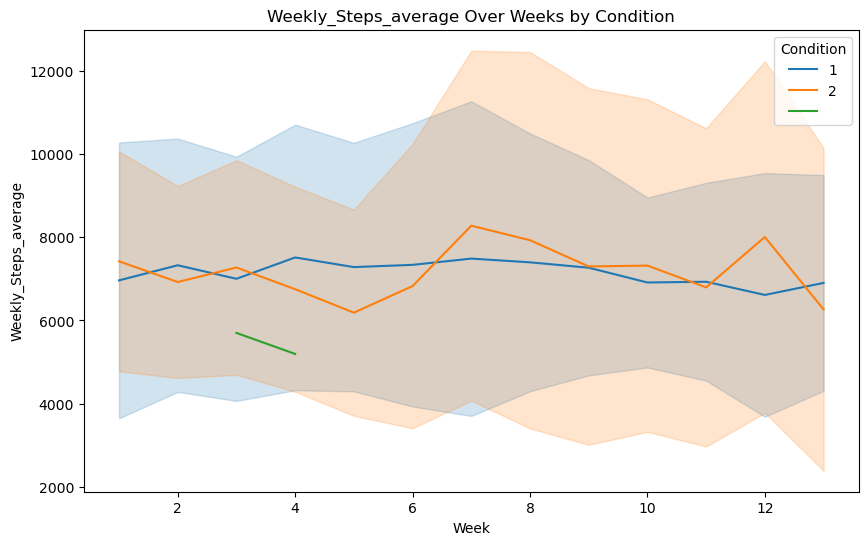

In [162]:
# 1. Longitudinal Analysis of Physical Activity Metrics
# Repeated Measures ANOVA for Weekly Active Minutes
#df.rename(columns={'Weekly Active Minute average': 'Weekly_Active_Minute_average'}, inplace=True)

df['Week'] = pd.to_numeric(df['Week'], errors='coerce')

# Filter data for weeks 1 to 13
df_filtered = df[(df['Week'] >= 1) & (df['Week'] <= 13)]

# Extract baseline activity for each participant
baseline_activity = df_filtered[df_filtered['Week'] == 1][['Participant ID', 'Weekly Steps average']]
baseline_activity.columns = ['Participant ID', 'Baseline_Activity']

# Merge baseline_activity with df_filtered
df_filtered = pd.merge(df_filtered, baseline_activity, on='Participant ID', how='left')

# Convert 'Weekly Active Minute average' to numeric, handling errors with coerce
df_filtered['Weekly_Steps_average'] = pd.to_numeric(df_filtered['Weekly Steps average'], errors='coerce')
df_filtered['Weekly Active Calories burned average'] = pd.to_numeric(df_filtered['Weekly Active Calories burned average'], errors='coerce')
df_filtered['Weekly Sedentary Minute average'] = pd.to_numeric(df_filtered['Weekly Sedentary Minute average'], errors='coerce')

# Create a new variable for the change in activity from baseline
df_filtered['Change_in_Activity'] = df_filtered['Weekly_Steps_average'] - df_filtered['Baseline_Activity']

# Perform Repeated Measures ANOVA with Type III sum of squares
formula = 'Weekly_Steps_average ~ C(Week) * C(Condition)'
model = sm.formula.ols(formula, data=df_filtered).fit()
anova_table = anova_lm(model, typ=3)

# Display the ANOVA summary
print(anova_table)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Week', y='Weekly_Steps_average', hue='Condition', data=df_filtered, ci='sd')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Weekly_Steps_average')
plt.title('Weekly_Steps_average Over Weeks by Condition')

# Show legend
plt.legend(title='Condition')

# Show the plot
plt.show()